In [1]:
# Libraries required

import pandas as pd
import numpy as np
import matplotlib as plt

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklego.meta import ZeroInflatedRegressor

from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from mypipes_hackathon import * # Pipeline file import

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Loading the data
df_train = pd.read_csv(r'/home/siddarth.jha@npci.org.in/Documents/Training/hackathon_data/data_train.csv')
df_test = pd.read_csv(r'/home/siddarth.jha@npci.org.in/Documents/Training/hackathon_data/data_test.csv')
df_train

,id,target,ind_01,ind_02_cat,ind_03,ind_04_cat,ind_05_cat,ind_06_bin,ind_07_bin,ind_08_bin,...,calc_11,calc_12,calc_13,calc_14,calc_15_bin,calc_16_bin,calc_17_bin,calc_18_bin,calc_19_bin,calc_20_bin
0,1260014,0,0,2,4,0,0,0,0,1,...,8,1,2,9,0,0,0,0,0,0
1,1086017,6520,1,1,1,0,4,1,0,0,...,1,1,2,4,0,1,1,0,1,0
2,602774,8570,5,1,3,1,0,0,0,1,...,6,1,5,11,0,1,1,1,0,0
3,366031,0,3,1,3,0,0,0,0,1,...,8,2,1,5,0,0,1,0,1,0
4,103981,0,0,1,5,0,0,0,1,0,...,8,0,1,12,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39784,835163,12430,0,2,0,0,-1,1,0,0,...,6,1,4,14,0,1,1,0,1,0
39785,680115,32440,4,2,1,1,0,0,1,0,...,6,0,2,11,0,1,1,1,0,1
39786,402120,5760,1,1,7,0,0,1,0,0,...,7,2,3,4,0,1,1,0,1,1
39787,968745,0,0,1,5,0,0,0,0,0,...,9,1,3,7,0,1,0,1,0,1


In [3]:
# df_test

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39789 entries, 0 to 39788
Data columns (total 59 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           39789 non-null  int64  
 1   target       39789 non-null  int64  
 2   ind_01       39789 non-null  int64  
 3   ind_02_cat   39789 non-null  int64  
 4   ind_03       39789 non-null  int64  
 5   ind_04_cat   39789 non-null  int64  
 6   ind_05_cat   39789 non-null  int64  
 7   ind_06_bin   39789 non-null  int64  
 8   ind_07_bin   39789 non-null  int64  
 9   ind_08_bin   39789 non-null  int64  
 10  ind_09_bin   39789 non-null  int64  
 11  ind_10_bin   39789 non-null  int64  
 12  ind_11_bin   39789 non-null  int64  
 13  ind_12_bin   39789 non-null  int64  
 14  ind_13_bin   39789 non-null  int64  
 15  ind_14       39789 non-null  int64  
 16  ind_15       39789 non-null  int64  
 17  ind_16_bin   39789 non-null  int64  
 18  ind_17_bin   39789 non-null  int64  
 19  ind_

In [5]:
# df_test.info()

In [6]:
df_train['car_05_cat'].value_counts()

-1    16663
 1    12146
 0    10980
Name: car_05_cat, dtype: int64

In [7]:
# Pipeline

'''
1. DROP: id and target(for training--> x_train)
2. Impute missing & Dummy: ind_02_cat', 'ind_04_cat', 'ind_05_cat', 'car_01_cat', 'car_02_cat', 'car_03_cat',
             'car_04_cat','car_05_cat', 'car_06_cat', 'car_07_cat', 'car_08_cat', 'car_09_cat', 'car_10_cat', 
             'car_11_cat'
3. Impute Missing for all the remaining columns
'''

"\n1. DROP: id and target(for training--> x_train)\n2. Impute missing & Dummy: ind_02_cat', 'ind_04_cat', 'ind_05_cat', 'car_01_cat', 'car_02_cat', 'car_03_cat',\n             'car_04_cat','car_05_cat', 'car_06_cat', 'car_07_cat', 'car_08_cat', 'car_09_cat', 'car_10_cat', \n             'car_11_cat'\n3. Impute Missing for all the remaining columns\n"

<AxesSubplot:>

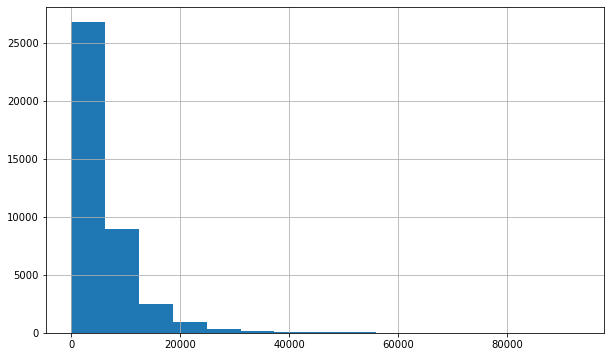

In [8]:
# Visualising the target variable
df_train['target'].hist(bins=15, figsize=(10, 6))

In [9]:
# Prcoessing Data
del df_train['id'] # DROP ID
del df_test['id']

y_train = df_train['target']
y_train = pd.DataFrame(y_train)

del df_train['target']

cat_vars = ['ind_02_cat', 'ind_04_cat', 'ind_05_cat', 'car_01_cat', 'car_02_cat', 'car_03_cat', 'car_04_cat',
            'car_05_cat', 'car_06_cat', 'car_07_cat', 'car_08_cat', 'car_09_cat', 'car_10_cat', 'car_11_cat']
num_vars = [var for var in df_train if var not in cat_vars]

In [10]:
p1 = pdPipeline([
    ('var_select', VarSelector(cat_vars)),
    ('missing_trt', DataFrameImputer()),
    ('dummies', get_dummies(1800))
])

p2 = pdPipeline([
    ('var_select', VarSelector(num_vars)),
    ('missing_trt', DataFrameImputer()),
])

data_pipe = FeatureUnion([
    ('int_to_dum', p1),
    ('impute_miss', p2)
])

In [11]:
x_train=pd.DataFrame(data=data_pipe.fit_transform(df_train),
                     columns=data_pipe.get_feature_names())
x_test=pd.DataFrame(data=data_pipe.transform(df_test),
                     columns=data_pipe.get_feature_names())

In [12]:
# x_train
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.6f} (std: {1:.6f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [13]:
zir = ZeroInflatedRegressor(
    classifier=RandomForestClassifier(),
    regressor=RandomForestRegressor()
)

In [26]:
RandomForestRegressor?

In [25]:
lambdas=np.linspace(.001,.5,100)

params = {"classifier__n_estimators":[100,200,300,500,700,1000], # 700,1000
            "classifier__max_features": [5,10,20,25,30,35,40,45,50,55,60,65,70], #70
            "classifier__bootstrap": [True, False],
            'classifier__class_weight':[None,'balanced'], 
            'classifier__criterion':['entropy','gini'],
            'classifier__max_depth':[None,5,10,15,20,30,50,70],
            'classifier__min_samples_leaf':[1,2,5,10,15,20], 
            'classifier__min_samples_split':[2,5,10,15,20],
            'classifier__random_state':[42],
            'regressor__random_state':[42],
            'regressor__ccp_alpha':lambdas,
            'regressor__max_depth':[None,5,10,15,20,30,50,70],
            'regressor__min_samples_leaf':[1,2,5,10,15,20], 
            'regressor__min_samples_split':[2,5,10,15,20],
          
            "regressor__n_estimators":[50,100,200], # Added extra 300 &400
            "regressor__max_features": [5,10,20,25,30,35,40,45,50,55,60,65,70], #70
            "regressor__bootstrap": [True, False],
                  }


In [15]:
grid_search=RandomizedSearchCV(zir,
                         param_distributions=params,
                         cv=10,
                         scoring="neg_mean_absolute_error",
                         n_jobs=-1,
                         verbose=20,
                        return_train_score=True
)

In [16]:
zir.get_params()

{'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 'auto',
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_impurity_split': None,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 100,
 'classifier__n_jobs': None,
 'classifier__oob_score': False,
 'classifier__random_state': None,
 'classifier__verbose': 0,
 'classifier__warm_start': False,
 'classifier': RandomForestClassifier(),
 'regressor__bootstrap': True,
 'regressor__ccp_alpha': 0.0,
 'regressor__criterion': 'mse',
 'regressor__max_depth': None,
 'regressor__max_features': 'auto',
 'regressor__max_leaf_nodes': None,
 'regressor__max_samples': None,
 'regressor__min_impurity_decrease': 0.0,
 'regressor__min_impu

In [17]:
grid_search.fit(x_train,y_train.values.ravel())

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=ZeroInflatedRegressor(classifier=RandomForestClassifier(),
                                                   regressor=RandomForestRegressor()),
                   n_jobs=-1,
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__class_weight': [None,
                                                                     'balanced'],
                                        'classifier__criterion': ['entropy',
                                                                  'gini'],
                                        'classifier__max_depth': [None, 5, 10,
                                                                  15, 20, 30,
                                                                  50, 70],
                                        'classifier__ma...
                                        'regressor__max_depth': [None, 5, 10,
           

In [18]:
model = grid_search.best_estimator_

In [19]:
grid_search.best_estimator_

ZeroInflatedRegressor(classifier=RandomForestClassifier(class_weight='balanced',
                                                        max_depth=20,
                                                        max_features=40,
                                                        min_samples_leaf=2,
                                                        random_state=55),
                      regressor=RandomForestRegressor(bootstrap=False,
                                                      ccp_alpha=0.2631010101010101,
                                                      max_depth=70,
                                                      max_features=25,
                                                      n_estimators=50,
                                                      random_state=55))

In [20]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -2493.394283 (std: 75.994363)
Parameters: {'regressor__random_state': 55, 'regressor__n_estimators': 50, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 25, 'regressor__max_depth': 70, 'regressor__ccp_alpha': 0.2631010101010101, 'regressor__bootstrap': False, 'classifier__random_state': 55, 'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 40, 'classifier__max_depth': 20, 'classifier__criterion': 'gini', 'classifier__class_weight': 'balanced', 'classifier__bootstrap': True}

Model with rank: 2
Mean validation score: -2550.043084 (std: 61.452595)
Parameters: {'regressor__random_state': 55, 'regressor__n_estimators': 300, 'regressor__min_samples_split': 15, 'regressor__min_samples_leaf': 10, 'regressor__max_features': 35, 'regressor__max_depth': 10, 'regressor__ccp_alpha': 0.29838383838383836, 'regressor__bootstrap': F

In [21]:
model.fit(x_train, y_train)

ZeroInflatedRegressor(classifier=RandomForestClassifier(class_weight='balanced',
                                                        max_depth=20,
                                                        max_features=40,
                                                        min_samples_leaf=2,
                                                        random_state=55),
                      regressor=RandomForestRegressor(bootstrap=False,
                                                      ccp_alpha=0.2631010101010101,
                                                      max_depth=70,
                                                      max_features=25,
                                                      n_estimators=50,
                                                      random_state=55))

In [22]:
y_predict = model.predict(x_test)

In [23]:
pd.DataFrame(y_predict).to_csv("sub3.csv",index=False) # 3500

In [24]:
1+2

3

In [70]:
lambdas=np.linspace(.01,.6,100)
params={ 
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20],
            'ccp_alpha': lambdas,
            'max_features':[5,10,20,25,30,35,40,45,50,55,60,65,70]
       }

In [71]:
reg=DecisionTreeRegressor()

In [72]:
random_search=RandomizedSearchCV(reg,
                                 cv=10,
                                 param_distributions=params,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

In [73]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.01      , 0.0159596 , 0.02191919, 0.02787879, 0.03383838,
       0.03979798, 0.04575758, 0.05171717, 0.05767677, 0.06363636,
       0.06959596, 0.07555556, 0.08151515, 0.08747475, 0.09343434,
       0.09939394, 0.10535354, 0.11131313, 0.11727273, 0.12323232,
       0.12919192, 0.13515152, 0.1411...
       0.51656566, 0.52252525, 0.52848485, 0.53444444, 0.54040404,
       0.54636364, 0.55232323, 0.55828283, 0.56424242, 0.57020202,
       0.57616162, 0.58212121, 0.58808081, 0.5940404 , 0.6       ]),
                                        'max_depth': [None, 5, 10, 15, 20, 30,
                                                      50, 70],
                                        'max_features': [5, 10, 20, 25, 30, 35,
                                                         40, 45, 50, 55, 60, 65,
                                                         70]

In [74]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -3141.879225 (std: 72.972032)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 30, 'max_depth': 70, 'ccp_alpha': 0.3139393939393939}

Model with rank: 2
Mean validation score: -3321.068425 (std: 69.853041)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 25, 'max_depth': 30, 'ccp_alpha': 0.06363636363636363}

Model with rank: 3
Mean validation score: -3602.989185 (std: 72.283570)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 55, 'max_depth': None, 'ccp_alpha': 0.24838383838383837}

Model with rank: 4
Mean validation score: -3655.662170 (std: 106.749423)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 65, 'max_depth': 50, 'ccp_alpha': 0.045757575757575754}

Model with rank: 5
Mean validation score: -3702.827217 (std: 70.290691)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 40, 'max_depth': 30, 'ccp_alpha'

In [25]:
param_dist = {"n_estimators":[50,100,200],
              "max_features": [2,4,5,6,8],
              "bootstrap": [True, False],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [26]:
reg=RandomForestRegressor()

In [28]:
n_iter_search = 10
random_search=RandomizedSearchCV(reg,
                                 cv=10,
                                 param_distributions=param_dist,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

random_search.fit(x_train,y_train.values.ravel())

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20, 30,
                                                      50, 70],
                                        'max_features': [2, 4, 5, 6, 8],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 200]},
                   scoring='neg_mean_absolute_error', verbose=20)

In [29]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -3874.085814 (std: 45.797627)
Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 2, 'max_depth': None, 'bootstrap': False}

Model with rank: 2
Mean validation score: -4077.637534 (std: 43.884617)
Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 8, 'max_depth': 50, 'bootstrap': True}

Model with rank: 3
Mean validation score: -4215.736203 (std: 44.851347)
Parameters: {'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 5, 'max_depth': 70, 'bootstrap': False}

Model with rank: 4
Mean validation score: -4258.845119 (std: 36.862216)
Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 8, 'max_depth': 20, 'bootstrap': False}

Model with rank: 5
Mean validation score: -4261.047378 (std: 46.238961)
Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_

In [30]:
param_dist = {"n_estimators":[50,100,200],
              "max_features": [2,4,5,6,8],
              "bootstrap": [True, False],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [32]:
from sklearn.ensemble import ExtraTreesRegressor


In [33]:
reg=ExtraTreesRegressor()

In [35]:
n_iter_search = 10
random_search=RandomizedSearchCV(reg,
                                 cv=10,
                                 param_distributions=param_dist,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

random_search.fit(x_train,y_train.values.ravel())

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20, 30,
                                                      50, 70],
                                        'max_features': [2, 4, 5, 6, 8],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 200]},
                   scoring='neg_mean_absolute_error', verbose=20)

In [36]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -3872.166664 (std: 43.171777)
Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 70, 'bootstrap': True}

Model with rank: 2
Mean validation score: -4281.680046 (std: 49.426493)
Parameters: {'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 50, 'bootstrap': True}

Model with rank: 3
Mean validation score: -4309.906460 (std: 46.137406)
Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 6, 'max_depth': 15, 'bootstrap': True}

Model with rank: 4
Mean validation score: -4324.990153 (std: 43.550543)
Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 8, 'max_depth': 50, 'bootstrap': False}

Model with rank: 5
Mean validation score: -4470.988847 (std: 43.348193)
Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 15, 'max_featu

In [80]:
model=Lasso()
lambdas=np.linspace(.01,.6,100)
params={'alpha':lambdas}

In [82]:
grid_search=RandomizedSearchCV(model,
                         param_distributions=params,
                         cv=10,
                         scoring='neg_mean_absolute_error',
                        verbose=20,n_jobs=-1)

In [83]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
                   param_distributions={'alpha': array([0.01      , 0.0159596 , 0.02191919, 0.02787879, 0.03383838,
       0.03979798, 0.04575758, 0.05171717, 0.05767677, 0.06363636,
       0.06959596, 0.07555556, 0.08151515, 0.08747475, 0.09343434,
       0.09939394, 0.10535354, 0.11131313, 0.11727273, 0.12323232,
       0.12919192, 0.13515152, 0.14111111, 0.14707071, 0.15...
       0.42717172, 0.43313131, 0.43909091, 0.44505051, 0.4510101 ,
       0.4569697 , 0.46292929, 0.46888889, 0.47484848, 0.48080808,
       0.48676768, 0.49272727, 0.49868687, 0.50464646, 0.51060606,
       0.51656566, 0.52252525, 0.52848485, 0.53444444, 0.54040404,
       0.54636364, 0.55232323, 0.55828283, 0.56424242, 0.57020202,
       0.57616162, 0.58212121, 0.58808081, 0.5940404 , 0.6       ])},
                   scoring='neg_mean_absolute_error', verbose=20)

In [84]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -4546.058172 (std: 44.841060)
Parameters: {'alpha': 0.01}

Model with rank: 2
Mean validation score: -4546.184320 (std: 44.743071)
Parameters: {'alpha': 0.14707070707070707}

Model with rank: 3
Mean validation score: -4546.245101 (std: 44.705289)
Parameters: {'alpha': 0.2007070707070707}

Model with rank: 4
Mean validation score: -4546.286686 (std: 44.679755)
Parameters: {'alpha': 0.23646464646464646}

Model with rank: 5
Mean validation score: -4546.340042 (std: 44.653003)
Parameters: {'alpha': 0.27818181818181814}



In [86]:
lasso_model=grid_search.best_estimator_

In [87]:
list(zip(data_pipe.get_feature_names(),lasso_model.coef_))

[('int_to_dum__ind_02_cat_1.0', -348.2931190414011),
 ('int_to_dum__ind_02_cat_2.0', 2218.250016222545),
 ('int_to_dum__ind_02_cat_3.0', -642.6066409969),
 ('int_to_dum__ind_04_cat_0.0', -58.679891108380765),
 ('int_to_dum__ind_05_cat_0.0', -1283.9287604218075),
 ('int_to_dum__car_01_cat_11.0', -568.1759263096793),
 ('int_to_dum__car_01_cat_7.0', -1003.2970463013481),
 ('int_to_dum__car_01_cat_6.0', -445.8835447943203),
 ('int_to_dum__car_01_cat_10.0', -543.9890056325767),
 ('int_to_dum__car_02_cat_1', -17.2836505757965),
 ('int_to_dum__car_03_cat_1.0', 126.9040073805058),
 ('int_to_dum__car_04_cat_0', 23.677012491449098),
 ('int_to_dum__car_04_cat_1', -31.57037082976129),
 ('int_to_dum__car_04_cat_2', 439.7297550742588),
 ('int_to_dum__car_05_cat_1.0', 1.3389497636154823),
 ('int_to_dum__car_06_cat_11', -435.78250579183685),
 ('int_to_dum__car_06_cat_1', -117.38393049261973),
 ('int_to_dum__car_06_cat_0', -255.22061043015268),
 ('int_to_dum__car_06_cat_14', -296.04391857786527),
 ('in